### Loading the dataset

In [7]:
import pandas as pd

# Corrected URL with raw data
all_matches_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/all_t20_world_cup_matches_results.csv'

# Attempting to load the CSV file
try:
    # Load the dataset from the correct URL
    all_matches_data_df = pd.read_csv(all_matches_url)
    print("Data loaded successfully:")
    print(all_matches_data_df.head())  # Use the correct variable name to print the data
except pd.errors.ParserError as e:
    print("ParserError occurred:", e)
except Exception as e:
    print("An error occurred:", e)


Data loaded successfully:
          Team1     Team2    Winner     Margin        Ground  Match Date  \
0         India  Pakistan     India     5 runs  Johannesburg  2007/09/24   
1     Australia     India     India    15 runs        Durban  2007/09/22   
2   New Zealand  Pakistan  Pakistan  6 wickets     Cape Town  2007/09/22   
3  South Africa     India     India    37 runs        Durban  2007/09/20   
4    Bangladesh  Pakistan  Pakistan  4 wickets     Cape Town  2007/09/20   

  T-20 Int Match  
0      T20I # 46  
1      T20I # 45  
2      T20I # 44  
3      T20I # 43  
4      T20I # 42  


In [8]:
import pandas as pd

# Corrected URL with raw data
url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/all_t20_world_cup_players_list.csv'

# Attempting to load the CSV file
try:
    # Load the dataset from the URL
    players_df = pd.read_csv(url)
    print("Data loaded successfully:")
    print(players_df.head())  # Use the correct variable name to print the data
except pd.errors.ParserError as e:
    print("ParserError occurred:", e)
except Exception as e:
    print("An error occurred:", e)


Data loaded successfully:
          Team  Year       Player Name
0  Afghanistan  2010     Nawroz Mangal
1  Afghanistan  2010     Asghar Afghan
2  Afghanistan  2010       Karim Sadiq
3  Afghanistan  2010  Mohammad Shahzad
4  Afghanistan  2010   Noor Ali Zadran


In [9]:
import pandas as pd

# Corrected URLs with raw data

final_dataset_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/wc_final_dataset.csv'


# Loading the final dataset CSV file
try:
    wc_final_data_df = pd.read_csv(final_dataset_url)
    print("\nFinal dataset loaded successfully:")
    print(final_dataset.head())
except pd.errors.ParserError as e:
    print("ParserError occurred in final dataset:", e)
except Exception as e:
    print("An error occurred in final dataset:", e)



Final dataset loaded successfully:
An error occurred in final dataset: name 'final_dataset' is not defined


### Missingness

In [11]:
import pandas as pd

# URLs for the datasets
matches_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/all_t20_world_cup_matches_results.csv'
players_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/all_t20_world_cup_players_list.csv'
final_dataset_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/wc_final_dataset.csv'

# Load the datasets from the URLs
all_matches_data_df = pd.read_csv(matches_url)
players_df = pd.read_csv(players_url)
final_dataset_df = pd.read_csv(final_dataset_url)

# Check for missing values in each dataset
missing_values_all_matches = all_matches_data_df.isnull().sum()
missing_values_final_dataset = final_dataset_df.isnull().sum()
missing_values_players = players_df.isnull().sum()

# Print the missing values for each dataset
print("Missing values in all_matches_data_df:\n", missing_values_all_matches)
print("Missing values in final_dataset_df:\n", missing_values_final_dataset)
print("Missing values in players_df:\n", missing_values_players)


Missing values in all_matches_data_df:
 Team1             0
Team2             0
Winner            0
Margin            0
Ground            0
Match Date        0
T-20 Int Match    0
dtype: int64
Missing values in final_dataset_df:
 Team1                           0
Team2                           0
Winner                          0
Margin                          0
Ground                          0
Match Date                      0
T-20 Int Match                  0
Team1 Avg Batting Ranking       0
Team2 Avg Batting Ranking       0
Team1 Avg Bowling Ranking       0
Team2 Avg Bowling Ranking       0
Team1 Total WCs participated    0
Team1 Total WCs won             0
Team2 Total WCs participated    0
Team2 Total WCs won             0
Team1 win % over Team2          0
dtype: int64
Missing values in players_df:
 Team           0
Year           0
Player Name    0
dtype: int64


NO MISIING DATA

### IDA and Data Cleaning


In [14]:
import pandas as pd
import re

# Function to extract the numeric part of the margin and T-20 Int Match
def extract_numeric_value(value):
    match = re.search(r'\d+', str(value))
    return int(match.group()) if match else None

# Function to extract the match number from 'T-20 Int Match'
def extract_t20_int_match(value):
    match = re.search(r'# (\d+)', str(value))  # Extract the number after the hash symbol
    return int(match.group(1)) if match else None

url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/all_t20_world_cup_matches_results.csv'

# Load the dataset
all_matches_data_df = pd.read_csv(url)

# Convert 'Margin' column to numeric by extracting the numeric part
all_matches_data_df['Margin'] = all_matches_data_df['Margin'].apply(extract_numeric_value)

# Convert 'T-20 Int Match' to numeric by extracting the match number
all_matches_data_df['T-20 Int Match'] = all_matches_data_df['T-20 Int Match'].apply(extract_t20_int_match)

# Convert 'Match Date' to a datetime format and then extract useful numeric components like year, month, and day
all_matches_data_df['Match Date'] = pd.to_datetime(all_matches_data_df['Match Date'], format='%Y/%m/%d')

# Extract year, month, and day as separate numeric columns
all_matches_data_df['Match Year'] = all_matches_data_df['Match Date'].dt.year
all_matches_data_df['Match Month'] = all_matches_data_df['Match Date'].dt.month
all_matches_data_df['Match Day'] = all_matches_data_df['Match Date'].dt.day

# Drop the original 'Match Date' column
all_matches_data_df = all_matches_data_df.drop(columns=['Match Date'])

# Display the first few rows of the updated dataset
print(all_matches_data_df.head())


          Team1     Team2    Winner  Margin        Ground  T-20 Int Match  \
0         India  Pakistan     India     5.0  Johannesburg              46   
1     Australia     India     India    15.0        Durban              45   
2   New Zealand  Pakistan  Pakistan     6.0     Cape Town              44   
3  South Africa     India     India    37.0        Durban              43   
4    Bangladesh  Pakistan  Pakistan     4.0     Cape Town              42   

   Match Year  Match Month  Match Day  
0        2007            9         24  
1        2007            9         22  
2        2007            9         22  
3        2007            9         20  
4        2007            9         20  


In [15]:
import pandas as pd
import re

# Function to extract the numeric part of the margin and T-20 Int Match
def extract_numeric_value(value):
    match = re.search(r'\d+', str(value))
    return int(match.group()) if match else None

# Function to extract the match number from 'T-20 Int Match'
def extract_t20_int_match(value):
    match = re.search(r'# (\d+)', str(value))  # Extract the number after the hash symbol
    return int(match.group(1)) if match else None

# URL for the wc_final_dataset
final_dataset_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/wc_final_dataset.csv'

# Load the dataset
wc_final_data_df = pd.read_csv(final_dataset_url)

# Convert 'Margin' column to numeric by extracting the numeric part
wc_final_data_df['Margin'] = wc_final_data_df['Margin'].apply(extract_numeric_value)

# Convert 'T-20 Int Match' to numeric by extracting the match number
wc_final_data_df['T-20 Int Match'] = wc_final_data_df['T-20 Int Match'].apply(extract_t20_int_match)

# Convert 'Match Date' to a datetime format and then extract useful numeric components like year, month, and day
wc_final_data_df['Match Date'] = pd.to_datetime(wc_final_data_df['Match Date'], format='%Y/%m/%d')

# Extract year, month, and day as separate numeric columns
wc_final_data_df['Match Year'] = wc_final_data_df['Match Date'].dt.year
wc_final_data_df['Match Month'] = wc_final_data_df['Match Date'].dt.month
wc_final_data_df['Match Day'] = wc_final_data_df['Match Date'].dt.day

# Drop the original 'Match Date' column
wc_final_data_df = wc_final_data_df.drop(columns=['Match Date'])

# Display the first few rows of the updated dataset
print(wc_final_data_df.head())


          Team1     Team2    Winner  Margin        Ground  T-20 Int Match  \
0         India  Pakistan     India     5.0  Johannesburg              46   
1     Australia     India     India    15.0        Durban              45   
2   New Zealand  Pakistan  Pakistan     6.0     Cape Town              44   
3  South Africa     India     India    37.0        Durban              43   
4    Bangladesh  Pakistan  Pakistan     4.0     Cape Town              42   

   Team1 Avg Batting Ranking  Team2 Avg Batting Ranking  \
0                      67.13                      65.87   
1                      66.54                      70.20   
2                      66.07                      67.20   
3                      69.53                      75.67   
4                      75.53                      69.67   

   Team1 Avg Bowling Ranking  Team2 Avg Bowling Ranking  \
0                      80.67                      63.40   
1                      58.77                      82.40   
2    

### EDA

In [17]:
# Feature Engineering: Create ranking difference features for wc_final_data_df
wc_final_data_df['Batting Ranking Difference'] = abs(wc_final_data_df['Team1 Avg Batting Ranking'] - wc_final_data_df['Team2 Avg Batting Ranking'])
wc_final_data_df['Bowling Ranking Difference'] = abs(wc_final_data_df['Team1 Avg Bowling Ranking'] - wc_final_data_df['Team2 Avg Bowling Ranking'])

# Display the first few rows to confirm
print("wc_final_data_df with new features:\n", wc_final_data_df.head())


wc_final_data_df with new features:
           Team1     Team2    Winner  Margin        Ground  T-20 Int Match  \
0         India  Pakistan     India     5.0  Johannesburg              46   
1     Australia     India     India    15.0        Durban              45   
2   New Zealand  Pakistan  Pakistan     6.0     Cape Town              44   
3  South Africa     India     India    37.0        Durban              43   
4    Bangladesh  Pakistan  Pakistan     4.0     Cape Town              42   

   Team1 Avg Batting Ranking  Team2 Avg Batting Ranking  \
0                      67.13                      65.87   
1                      66.54                      70.20   
2                      66.07                      67.20   
3                      69.53                      75.67   
4                      75.53                      69.67   

   Team1 Avg Bowling Ranking  Team2 Avg Bowling Ranking  \
0                      80.67                      63.40   
1                      58.7

In [18]:
# Summary statistics for both datasets
matches_summary = all_matches_data_df.describe()
final_dataset_summary = wc_final_data_df.describe()

# Display summary statistics
print("Summary statistics for matches_results_df:\n", matches_summary)
print("Summary statistics for final_dataset_df:\n", final_dataset_summary)


Summary statistics for matches_results_df:
            Margin  T-20 Int Match   Match Year  Match Month   Match Day
count  305.000000      317.000000   317.000000   317.000000  317.000000
mean    22.019672     1029.388013  2016.381703     6.993691   15.747634
std     28.071331      946.762530     5.892715     2.827301    8.588668
min      1.000000       20.000000  2007.000000     3.000000    1.000000
25%      6.000000      176.000000  2010.000000     5.000000    8.000000
50%      8.000000      538.000000  2016.000000     6.000000   16.000000
75%     26.000000     1841.000000  2022.000000    10.000000   22.000000
max    172.000000     2729.000000  2024.000000    11.000000   31.000000
Summary statistics for final_dataset_df:
            Margin  T-20 Int Match  Team1 Avg Batting Ranking  \
count  305.000000      317.000000                 317.000000   
mean    22.019672     1029.388013                  81.831420   
std     28.071331      946.762530                   9.521749   
min      1

In [19]:
# Check if the required columns exist in the dataset before proceeding
print(wc_final_data_df.columns)

# Create Batting Ranking Difference and Bowling Ranking Difference if the necessary columns are present
if 'Team1 Avg Batting Ranking' in wc_final_data_df.columns and 'Team2 Avg Batting Ranking' in wc_final_data_df.columns:
    wc_final_data_df['Batting Ranking Difference'] = abs(wc_final_data_df['Team1 Avg Batting Ranking'] - wc_final_data_df['Team2 Avg Batting Ranking'])

if 'Team1 Avg Bowling Ranking' in wc_final_data_df.columns and 'Team2 Avg Bowling Ranking' in wc_final_data_df.columns:
    wc_final_data_df['Bowling Ranking Difference'] = abs(wc_final_data_df['Team1 Avg Bowling Ranking'] - wc_final_data_df['Team2 Avg Bowling Ranking'])

# Display the first few rows of the updated dataset to confirm the new columns were added
print(wc_final_data_df.head())


Index(['Team1', 'Team2', 'Winner', 'Margin', 'Ground', 'T-20 Int Match',
       'Team1 Avg Batting Ranking', 'Team2 Avg Batting Ranking',
       'Team1 Avg Bowling Ranking', 'Team2 Avg Bowling Ranking',
       'Team1 Total WCs participated', 'Team1 Total WCs won',
       'Team2 Total WCs participated', 'Team2 Total WCs won',
       'Team1 win % over Team2', 'Match Year', 'Match Month', 'Match Day',
       'Batting Ranking Difference', 'Bowling Ranking Difference'],
      dtype='object')
          Team1     Team2    Winner  Margin        Ground  T-20 Int Match  \
0         India  Pakistan     India     5.0  Johannesburg              46   
1     Australia     India     India    15.0        Durban              45   
2   New Zealand  Pakistan  Pakistan     6.0     Cape Town              44   
3  South Africa     India     India    37.0        Durban              43   
4    Bangladesh  Pakistan  Pakistan     4.0     Cape Town              42   

   Team1 Avg Batting Ranking  Team2 Avg Batti

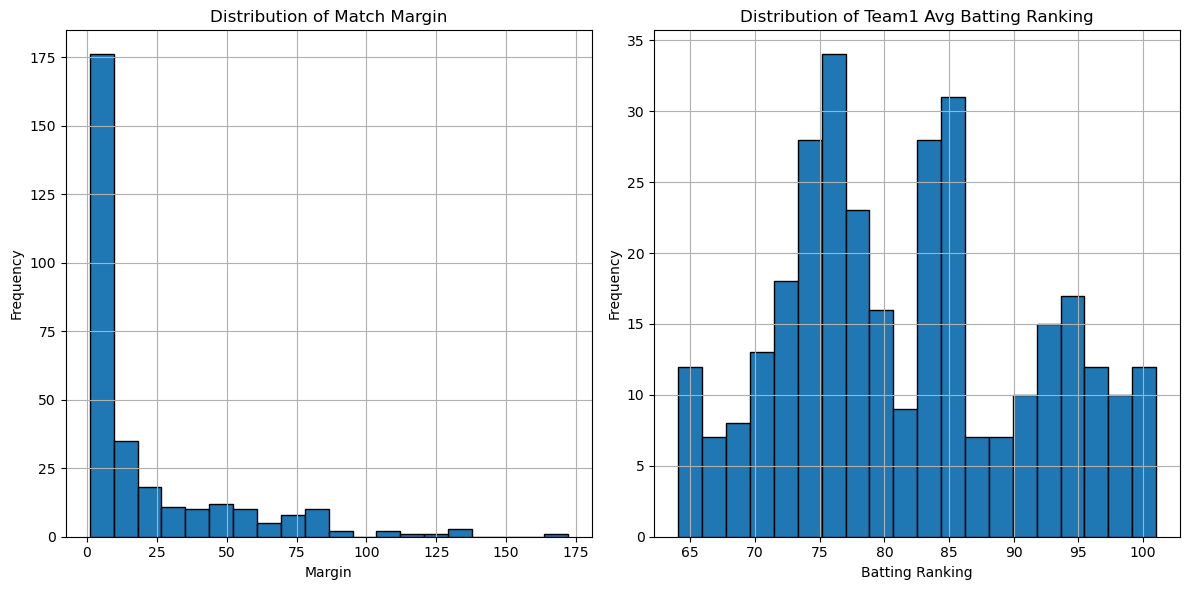

In [20]:
import matplotlib.pyplot as plt

# Visualize the distribution of key numeric features in final_dataset_df
plt.figure(figsize=(12, 6))

# Plot the distribution of Match Margin
plt.subplot(1, 2, 1)
wc_final_data_df['Margin'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Match Margin')
plt.xlabel('Margin')
plt.ylabel('Frequency')

# Plot the distribution of Team1 Avg Batting Ranking
plt.subplot(1, 2, 2)
wc_final_data_df['Team1 Avg Batting Ranking'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Team1 Avg Batting Ranking')
plt.xlabel('Batting Ranking')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


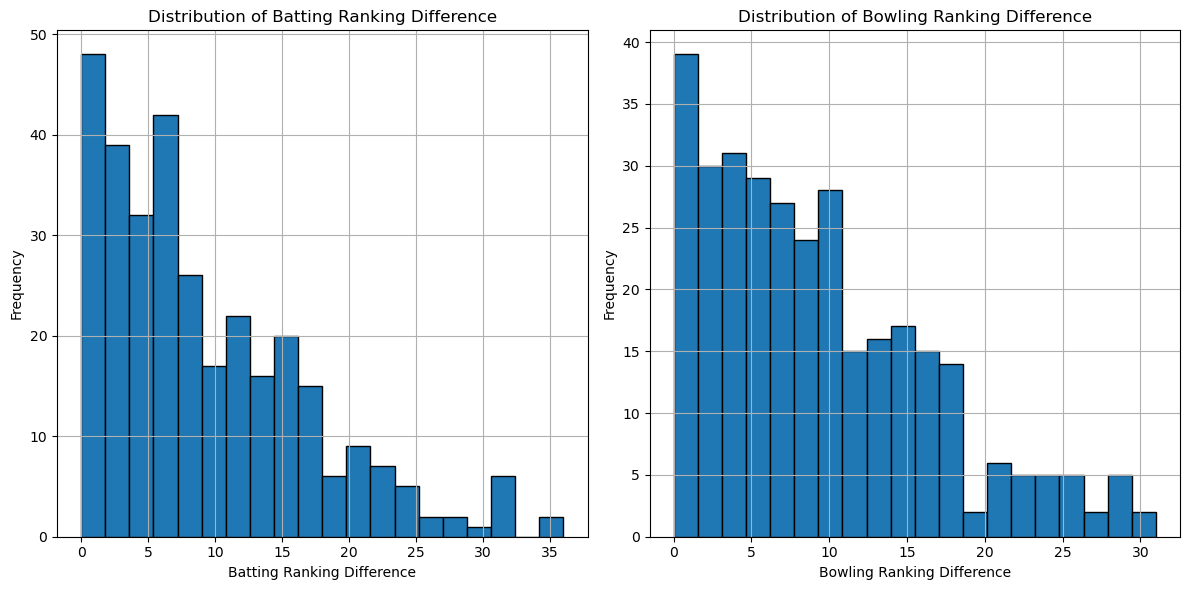

In [21]:
# Visualize the distribution of the new features
plt.figure(figsize=(12, 6))

# Plot Batting Ranking Difference
plt.subplot(1, 2, 1)
wc_final_data_df['Batting Ranking Difference'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Batting Ranking Difference')
plt.xlabel('Batting Ranking Difference')
plt.ylabel('Frequency')

# Plot Bowling Ranking Difference
plt.subplot(1, 2, 2)
wc_final_data_df['Bowling Ranking Difference'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Bowling Ranking Difference')
plt.xlabel('Bowling Ranking Difference')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [22]:
wc_final_data_df.to_csv('updated_wc_final_data_df', index=False)

# Display the updated dataset with new features
print("Updated Final Dataset with Ranking Differences:\n", wc_final_data_df.head())


Updated Final Dataset with Ranking Differences:
           Team1     Team2    Winner  Margin        Ground  T-20 Int Match  \
0         India  Pakistan     India     5.0  Johannesburg              46   
1     Australia     India     India    15.0        Durban              45   
2   New Zealand  Pakistan  Pakistan     6.0     Cape Town              44   
3  South Africa     India     India    37.0        Durban              43   
4    Bangladesh  Pakistan  Pakistan     4.0     Cape Town              42   

   Team1 Avg Batting Ranking  Team2 Avg Batting Ranking  \
0                      67.13                      65.87   
1                      66.54                      70.20   
2                      66.07                      67.20   
3                      69.53                      75.67   
4                      75.53                      69.67   

   Team1 Avg Bowling Ranking  Team2 Avg Bowling Ranking  \
0                      80.67                      63.40   
1              

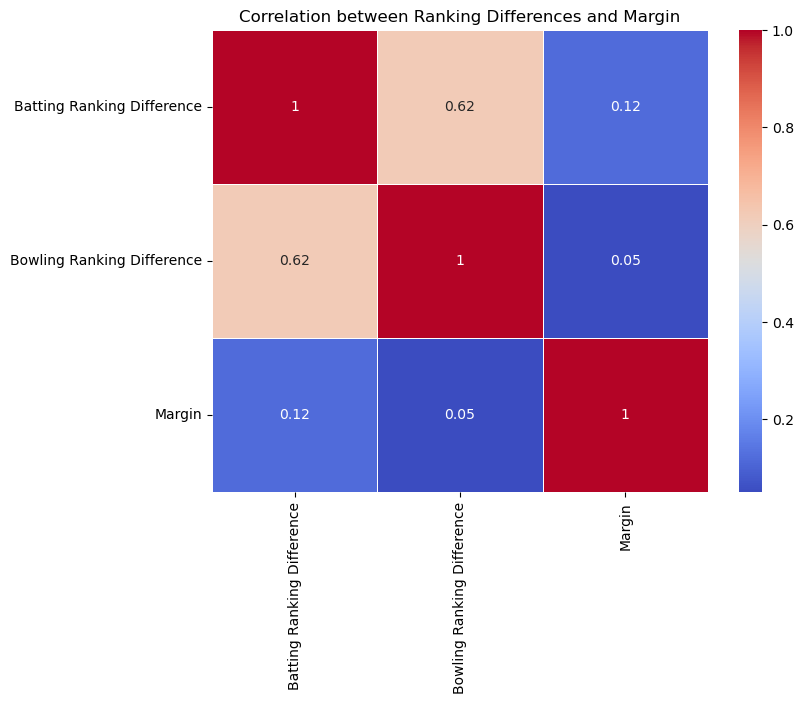

In [23]:
import seaborn as sns  
import matplotlib.pyplot as plt  
import re  

def extract_numeric(value):
    match = re.search(r'\d+', str(value))
    return int(match.group()) if match else None

# Clean the 'Margin' column in wc_final_data_df to convert it into numeric values
wc_final_data_df['Margin'] = wc_final_data_df['Margin'].apply(extract_numeric)

# Check the correlation of the new features with match outcomes (like Margin)
feature_correlation = wc_final_data_df[['Batting Ranking Difference', 'Bowling Ranking Difference', 'Margin']].corr()

# Visualize the correlation between ranking differences and match outcomes
plt.figure(figsize=(8, 6))
sns.heatmap(feature_correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Ranking Differences and Margin')
plt.show()


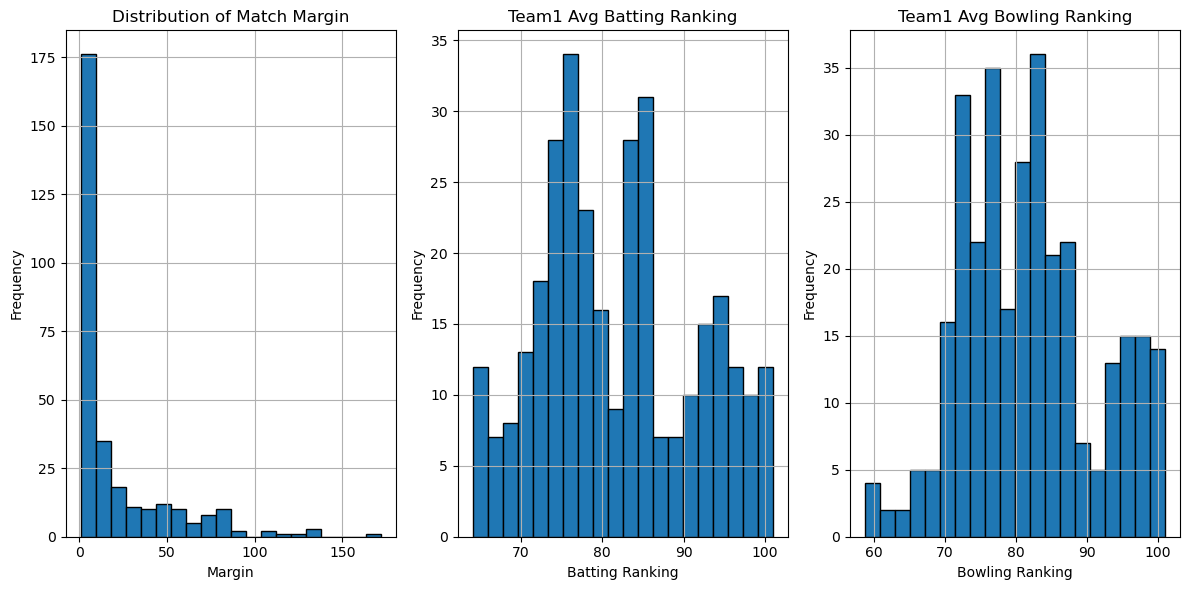

In [24]:
# Visualize distributions of key features like Margin, Batting Ranking, and Bowling Ranking
plt.figure(figsize=(12, 6))

# Plot the distribution of Match Margin
plt.subplot(1, 3, 1)
wc_final_data_df['Margin'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Match Margin')
plt.xlabel('Margin')
plt.ylabel('Frequency')

# Plot the distribution of Team1 Avg Batting Ranking
plt.subplot(1, 3, 2)
wc_final_data_df['Team1 Avg Batting Ranking'].hist(bins=20, edgecolor='black')
plt.title('Team1 Avg Batting Ranking')
plt.xlabel('Batting Ranking')
plt.ylabel('Frequency')

# Plot the distribution of Team1 Avg Bowling Ranking
plt.subplot(1, 3, 3)
wc_final_data_df['Team1 Avg Bowling Ranking'].hist(bins=20, edgecolor='black')
plt.title('Team1 Avg Bowling Ranking')
plt.xlabel('Bowling Ranking')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


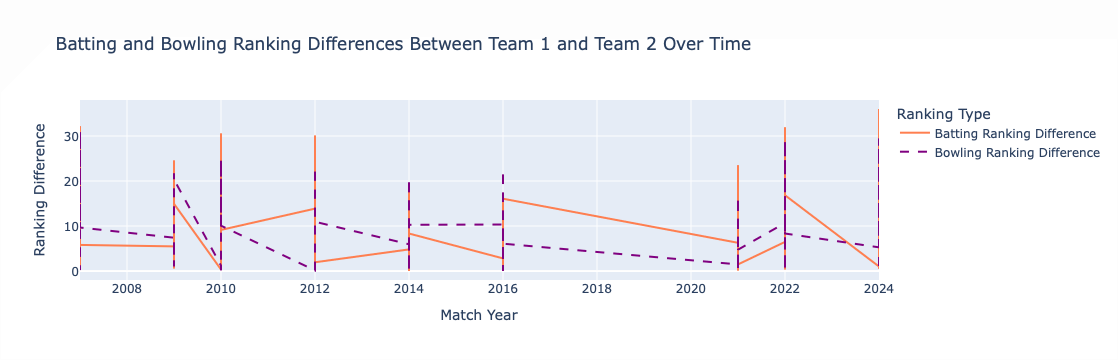

In [25]:
import plotly.graph_objects as go
import pandas as pd

# Ensure that 'Match Year' exists in the dataset (it's already present based on your data)
# Create an interactive line plot
fig = go.Figure()

# Add line for Batting Ranking Difference with hover text for Team 1 and Team 2 names
fig.add_trace(go.Scatter(
    x=wc_final_data_df['Match Year'],
    y=wc_final_data_df['Batting Ranking Difference'],
    mode='lines',
    name='Batting Ranking Difference',
    line=dict(color='coral'),
    hovertext=wc_final_data_df.apply(lambda row: f"Team 1: {row['Team1']}<br>Team 2: {row['Team2']}", axis=1),  # Adding team names in hover text
    hoverinfo='text+y'
))

# Add line for Bowling Ranking Difference with hover text for Team 1 and Team 2 names
fig.add_trace(go.Scatter(
    x=wc_final_data_df['Match Year'],
    y=wc_final_data_df['Bowling Ranking Difference'],
    mode='lines',
    name='Bowling Ranking Difference',
    line=dict(color='purple', dash='dash'),
    hovertext=wc_final_data_df.apply(lambda row: f"Team 1: {row['Team1']}<br>Team 2: {row['Team2']}", axis=1),  # Adding team names in hover text
    hoverinfo='text+y'
))

# Customize layout
fig.update_layout(
    title='Batting and Bowling Ranking Differences Between Team 1 and Team 2 Over Time',
    xaxis_title='Match Year',
    yaxis_title='Ranking Difference',
    legend_title='Ranking Type',
    hovermode='x unified'
)

# Show the plot
fig.show()


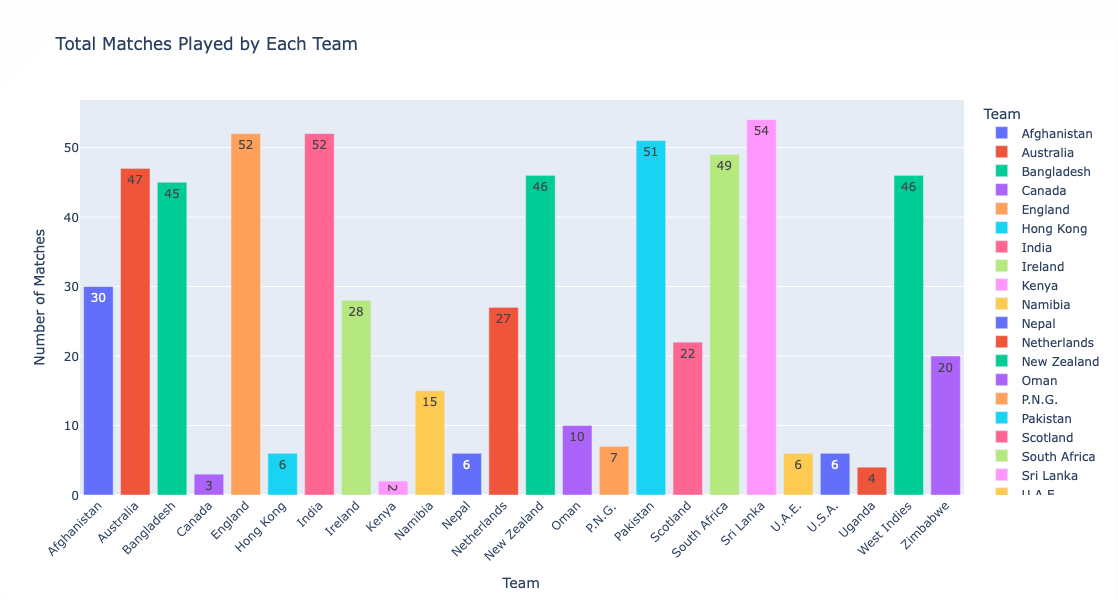

ValueError: Invalid property specified for object of type plotly.graph_objs.layout.Geo: 'width'

Did you mean "center"?

    Valid properties:
        bgcolor
            Set the background color of the map
        center
            :class:`plotly.graph_objects.layout.geo.Center`
            instance or dict with compatible properties
        coastlinecolor
            Sets the coastline color.
        coastlinewidth
            Sets the coastline stroke width (in px).
        countrycolor
            Sets line color of the country boundaries.
        countrywidth
            Sets line width (in px) of the country boundaries.
        domain
            :class:`plotly.graph_objects.layout.geo.Domain`
            instance or dict with compatible properties
        fitbounds
            Determines if this subplot's view settings are auto-
            computed to fit trace data. On scoped maps, setting
            `fitbounds` leads to `center.lon` and `center.lat`
            getting auto-filled. On maps with a non-clipped
            projection, setting `fitbounds` leads to `center.lon`,
            `center.lat`, and `projection.rotation.lon` getting
            auto-filled. On maps with a clipped projection, setting
            `fitbounds` leads to `center.lon`, `center.lat`,
            `projection.rotation.lon`, `projection.rotation.lat`,
            `lonaxis.range` and `lonaxis.range` getting auto-
            filled. If "locations", only the trace's visible
            locations are considered in the `fitbounds`
            computations. If "geojson", the entire trace input
            `geojson` (if provided) is considered in the
            `fitbounds` computations, Defaults to False.
        framecolor
            Sets the color the frame.
        framewidth
            Sets the stroke width (in px) of the frame.
        lakecolor
            Sets the color of the lakes.
        landcolor
            Sets the land mass color.
        lataxis
            :class:`plotly.graph_objects.layout.geo.Lataxis`
            instance or dict with compatible properties
        lonaxis
            :class:`plotly.graph_objects.layout.geo.Lonaxis`
            instance or dict with compatible properties
        oceancolor
            Sets the ocean color
        projection
            :class:`plotly.graph_objects.layout.geo.Projection`
            instance or dict with compatible properties
        resolution
            Sets the resolution of the base layers. The values have
            units of km/mm e.g. 110 corresponds to a scale ratio of
            1:110,000,000.
        rivercolor
            Sets color of the rivers.
        riverwidth
            Sets the stroke width (in px) of the rivers.
        scope
            Set the scope of the map.
        showcoastlines
            Sets whether or not the coastlines are drawn.
        showcountries
            Sets whether or not country boundaries are drawn.
        showframe
            Sets whether or not a frame is drawn around the map.
        showlakes
            Sets whether or not lakes are drawn.
        showland
            Sets whether or not land masses are filled in color.
        showocean
            Sets whether or not oceans are filled in color.
        showrivers
            Sets whether or not rivers are drawn.
        showsubunits
            Sets whether or not boundaries of subunits within
            countries (e.g. states, provinces) are drawn.
        subunitcolor
            Sets the color of the subunits boundaries.
        subunitwidth
            Sets the stroke width (in px) of the subunits
            boundaries.
        uirevision
            Controls persistence of user-driven changes in the view
            (projection and center). Defaults to
            `layout.uirevision`.
        visible
            Sets the default visibility of the base layers.
        
Did you mean "center"?

Bad property path:
width
^^^^^

In [206]:
import pandas as pd
import plotly.express as px

#Total matches played by each team - BAR PLOT 
fig = px.bar(total_matches, 
             x='Team', 
             y='Matches', 
             color='Team',  
             title='Total Matches Played by Each Team',
             labels={'Matches': 'Number of Matches', 'Team': 'Team'},
             text='Matches')

fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Number of Matches',
    hovermode='closest',
    width=1000,  
    height=600, 
    xaxis_tickangle=-45  
)
fig.show()



#Total matches played by each team - GEOSPATIAL 

matches_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/all_t20_world_cup_matches_results.csv'
wc_final_data_df = pd.read_csv(matches_url)

team1_counts = wc_final_data_df['Team1'].value_counts()
team2_counts = wc_final_data_df['Team2'].value_counts()

total_matches = pd.DataFrame({'Team': team1_counts.index, 'Matches': team1_counts.values})

team2_matches = pd.DataFrame({'Team': team2_counts.index, 'Matches': team2_counts.values})
total_matches = pd.concat([total_matches, team2_matches], ignore_index=True)

total_matches = total_matches.groupby('Team', as_index=False).sum()

ground_country_mapping = {
    'India': 'India',
    'Australia': 'Australia',
    'England': 'United Kingdom',
    'Pakistan': 'Pakistan',
    'South Africa': 'South Africa',
    'Sri Lanka': 'Sri Lanka',
    'West Indies': 'West Indies',
    'Bangladesh': 'Bangladesh',
    'Nepal': 'Nepal',
    'Zimbabwe': 'Zimbabwe',
    'Afghanistan': 'Afghanistan',
    'New Zealand': 'New Zealand',
    'Netherlands': 'Netherlands',
    'Scotland': 'Scotland',
    'U.S.A.': 'United States',
    'Ireland': 'Ireland',
    'Kenya': 'Kenya',
    'Oman': 'Oman',
    'United Arab Emirates': 'United Arab Emirates',
    'Hong Kong': 'Hong Kong',
    'P.N.G': 'Papua New Guinea',
    'Canada': 'Canada',
    'Uganda': 'Uganda'
     
}

total_matches['Country'] = total_matches['Team'].map(lambda x: ground_country_mapping.get(x, 'Unknown'))

fig = px.choropleth(total_matches,
                    locations='Country',  
                    locationmode='country names',  
                    color='Matches',  
                    hover_name='Country',  
                    hover_data=['Matches'],  
                    title='Total Matches Played by Each Team',
                    color_continuous_scale=px.colors.qualitative.Plotly) 

# Step 6: Customize the layout
fig.update_layout(
    geo=dict(
        showframe=False,  
        showcoastlines=True,  
        projection_type='natural earth',
        showsubunits=True, 
        showcountries=True,
        width=1100,  # Increase width
        height=1000  # Increase height
        
    )
)

fig.show()



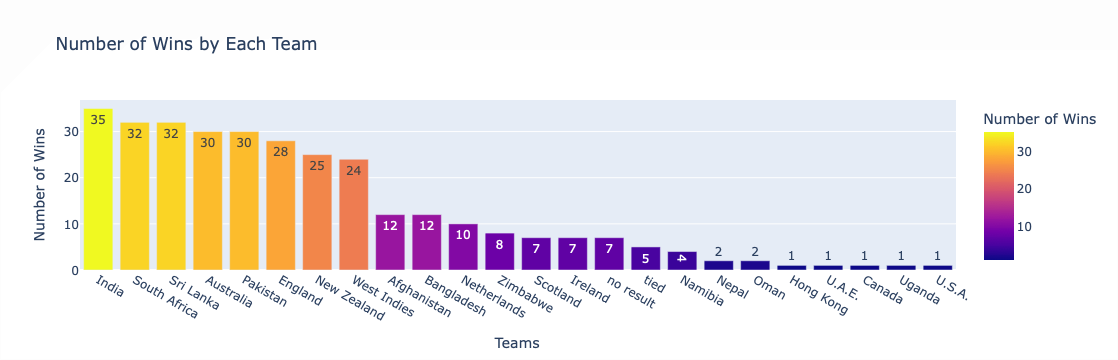

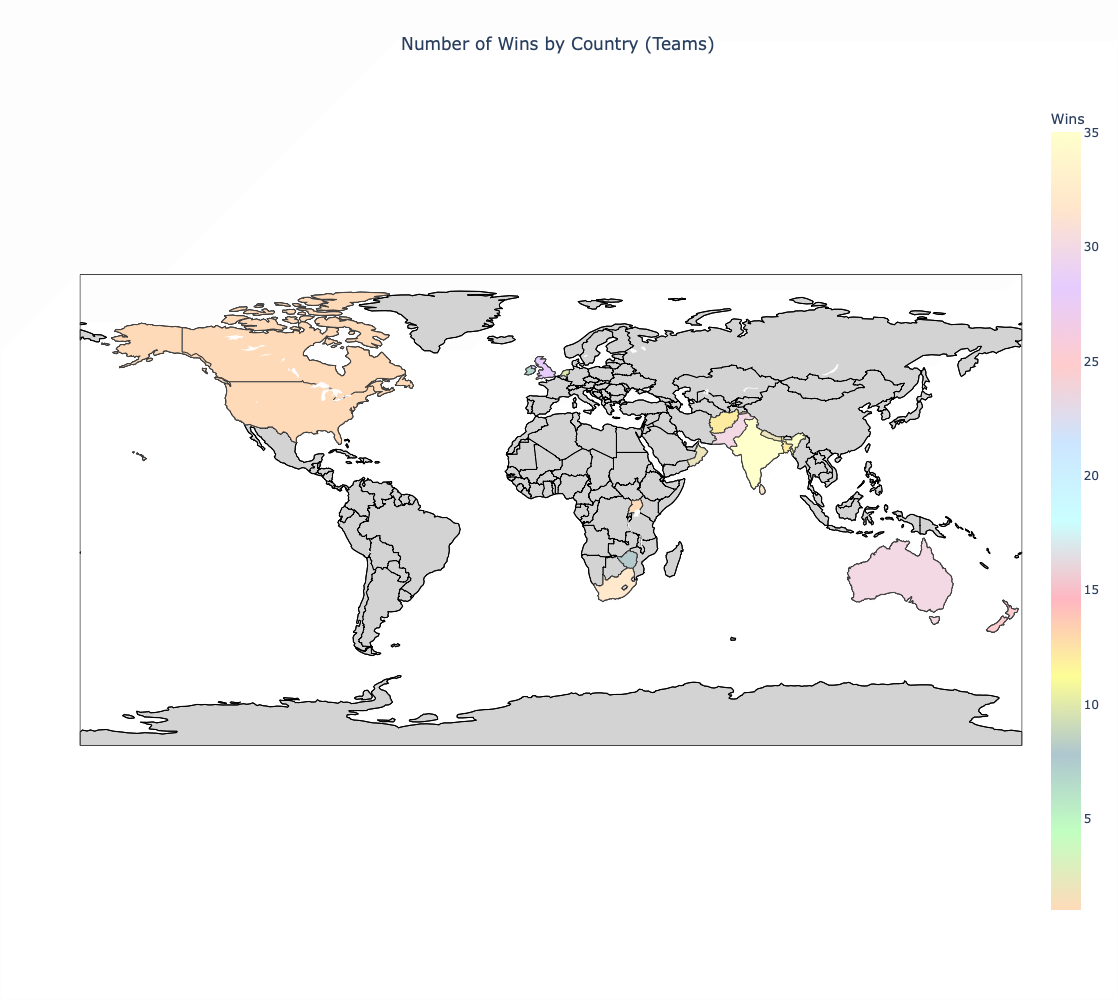

In [212]:
import plotly.express as px

# Count the number of wins by each team (using the 'Winner' column)
team_wins = wc_final_data_df['Winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']  # Renaming columns for clarity

# Create an interactive bar chart using Plotly Express
fig = px.bar(team_wins, x='Team', y='Wins', 
             title='Number of Wins by Each Team', 
             labels={'Team': 'Teams', 'Wins': 'Number of Wins'},
             hover_data=['Wins'],  # Display the number of wins in the hover text
             template='plotly',  # Use a clean template
             color='Wins',  # Color bars based on the number of wins
             text='Wins'  # Display the number of wins directly on the bars
            )

# Customize the layout (optional)
fig.update_layout(xaxis_title='Teams',
                  yaxis_title='Number of Wins',
                  hovermode='closest')

# Show the interactive plot
fig.show()

#Teams
team_country_mapping = {
    'India': 'India',
    'Australia': 'Australia',
    'England': 'United Kingdom',
    'Pakistan': 'Pakistan',
    'South Africa': 'South Africa',
    'Sri Lanka': 'Sri Lanka',
    'West Indies': 'West Indies',
    'Bangladesh': 'Bangladesh',
    'Nepal': 'Nepal',
    'Zimbabwe': 'Zimbabwe',
    'Afghanistan': 'Afghanistan',
    'New Zealand': 'New Zealand',
    'Netherlands': 'Netherlands',
    'Scotland': 'Scotland',
    'U.S.A.': 'United States',
    'Ireland': 'Ireland',
    'Kenya': 'Kenya',
    'Oman': 'Oman',
    'United Arab Emirates': 'United Arab Emirates',
    'Hong Kong': 'Hong Kong',
    'P.N.G': 'Papua New Guinea',
    'Canada': 'Canada',
    'Uganda': 'Uganda'
     
}

# Map teams in the dataset to countries
wc_final_data_df['Country'] = wc_final_data_df['Winner'].map(team_country_mapping)

# Count the number of wins by country
country_wins = wc_final_data_df['Country'].value_counts().reset_index()
country_wins.columns = ['Country', 'Wins']  # Renaming columns for clarity

# Create an interactive choropleth map using Plotly Express with a pastel color scale
fig = px.choropleth(country_wins,
                    locations='Country',  # The country names
                    locationmode='country names',  # Match based on country names
                    color='Wins',  # Number of wins determines the color intensity
                    hover_name='Country',  # Display the country name on hover
                    hover_data=['Wins'],  # Display the number of wins on hover
                    title='Number of Wins by Country (Teams)',
                    color_continuous_scale=[  # Custom pastel color scale
                        [0, 'rgb(255, 218, 185)'],  # Pastel peach
                        [0.1, 'rgb(193, 255, 193)'],  # Pastel green
                        [0.2, 'rgb(174, 198, 207)'],  # Pastel blue
                        [0.3, 'rgb(253, 253, 150)'],  # Pastel yellow
                        [0.4, 'rgb(255, 182, 193)'],  # Pastel pink
                        [0.5, 'rgb(202, 255, 255)'],  # Pastel cyan
                        [0.6, 'rgb(204, 229, 255)'],  # Pastel light blue
                        [0.7, 'rgb(255, 204, 204)'],  # Pastel light red
                        [0.8, 'rgb(229, 204, 255)'],  # Pastel purple
                        [0.9, 'rgb(255, 229, 204)'],  # Pastel orange
                        [1, 'rgb(255, 255, 204)']  # Pastel light yellow
                    ])




fig.update_geos(
    showcoastlines=True,  # Show coastlines
    coastlinecolor='Black',  # Coastline color
    landcolor='LightGray',  # Land color
    countrycolor='Black', # Country border color
    showsubunits=True,  # Show subunits (e.g. states)
    showcountries=True,
)

# Adjust the size of the figure
fig.update_layout(
    width=1100,  # Increase width
    height=1000,  # Increase height
    title_x=0.5  # Center the title
)

# Show the interactive plot
fig.show()



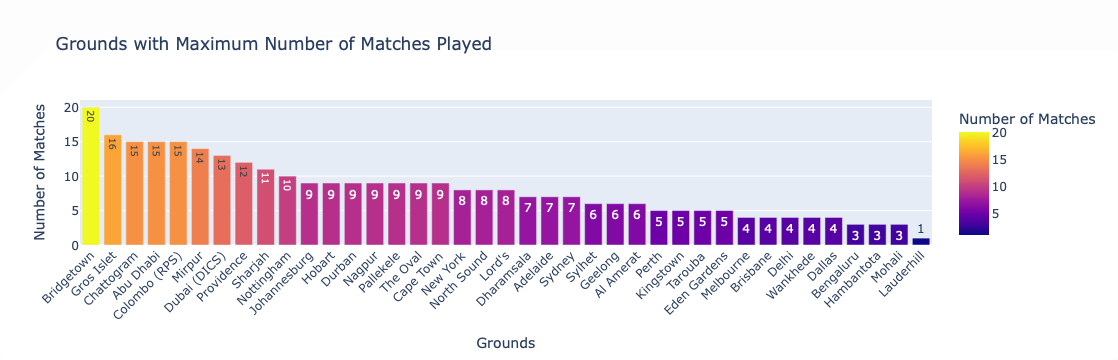

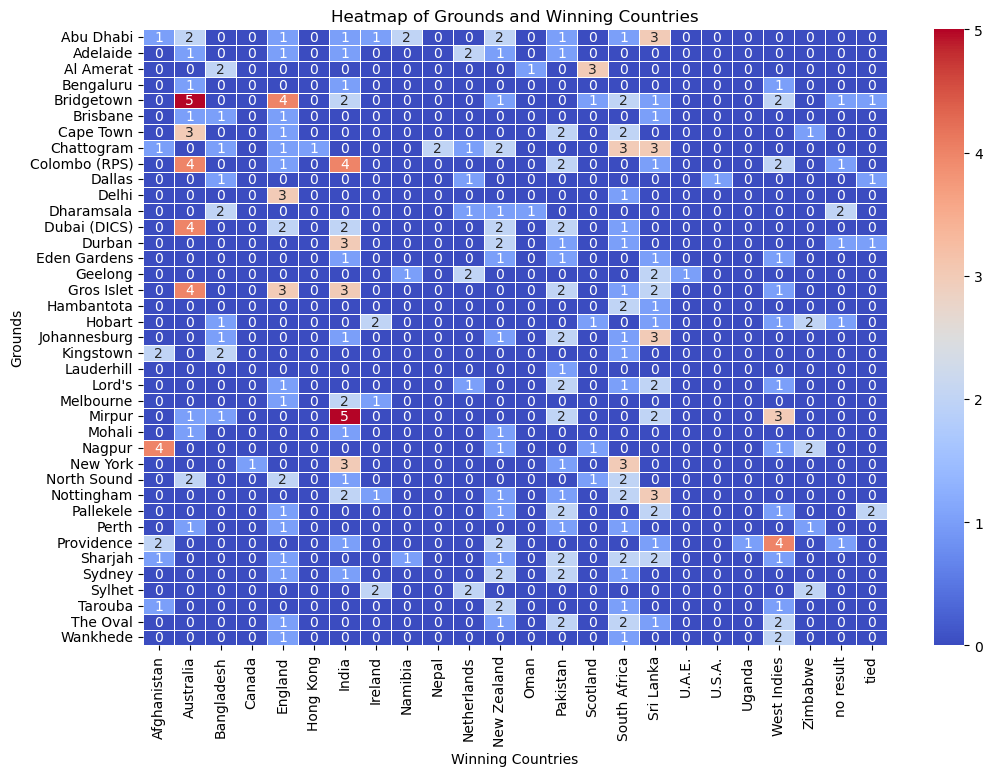

In [128]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ground with maximum number of matches played - BAR PLOT
ground_matches = wc_final_data_df['Ground'].value_counts().reset_index()
ground_matches.columns = ['Ground', 'Matches']  # Rename columns for clarity

ground_matches['Winning Teams'] = ground_matches['Ground'].map(
    lambda x: ', '.join(wc_final_data_df[wc_final_data_df['Ground'] == x]['Winner'].unique())
)

fig = px.bar(ground_matches,
             x='Ground',  # Grounds on x-axis
             y='Matches',  # Number of matches on y-axis
             title='Grounds with Maximum Number of Matches Played',
             labels={'Ground': 'Ground', 'Matches': 'Number of Matches'},  # Axis labels
             hover_data={'Matches': True, 'Winning Teams': True},  # Hover data to show the number of matches and winning teams
             template='plotly',  # Use a clean template
             text='Matches',  # Display the number of matches on the bars
             color='Matches',  # Color the bars based on the number of matches
             color_continuous_scale=px.colors.sequential.Plasma)  # Color scale

fig.update_layout(
    xaxis_title='Grounds',
    yaxis_title='Number of Matches',
    hovermode='closest',
    xaxis_tickangle=-45,  # Tilt x-axis labels for readability if necessary
    plot_bgcolor='rgba(255, 255, 255)',  # White background
    paper_bgcolor='rgba(255, 255, 255)'  # White outer background
)

fig.show()


# Ground with maximum number of matches played - BAR PLOT
# The values are the number of matches won by each team at each ground
ground_winner_pivot = wc_final_data_df.pivot_table(index='Ground', 
                                                   columns='Winner', 
                                                   aggfunc='size', 
                                                   fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(ground_winner_pivot, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Grounds and Winning Countries')
plt.xlabel('Winning Countries')
plt.ylabel('Grounds')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


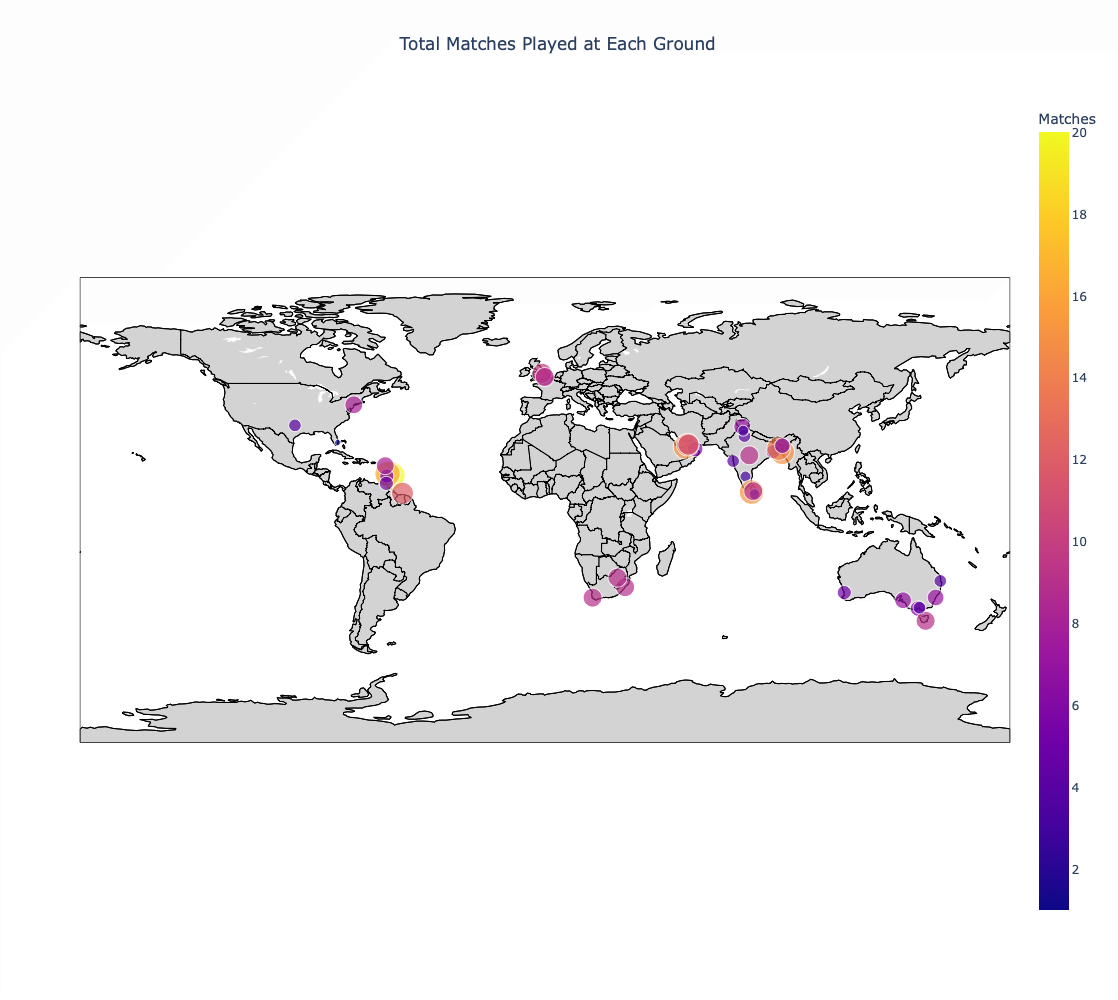

In [216]:
import pandas as pd
import plotly.express as px

# Ground data with coordinates
ground_data = {
    'Abu Dhabi': {'Country': 'United Arab Emirates', 'Lat': 24.4539, 'Lon': 54.3773},
    'Adelaide': {'Country': 'Australia', 'Lat': -34.9285, 'Lon': 138.6007},
    'Al Amerat': {'Country': 'Oman', 'Lat': 23.5881, 'Lon': 58.1364},
    'Bengaluru': {'Country': 'India', 'Lat': 12.9716, 'Lon': 77.5946},
    'Bridgetown': {'Country': 'West Indies', 'Lat': 13.1939, 'Lon': -59.6131},
    'Brisbane': {'Country': 'Australia', 'Lat': -27.4698, 'Lon': 153.0251},
    'Cape Town': {'Country': 'South Africa', 'Lat': -33.9249, 'Lon': 18.4241},
    'Chattogram': {'Country': 'Bangladesh', 'Lat': 22.3475, 'Lon': 91.8123},
    'Colombo (RPS)': {'Country': 'Sri Lanka', 'Lat': 6.9271, 'Lon': 79.9553},
    'Dallas': {'Country': 'United States', 'Lat': 32.7767, 'Lon': -96.7970},
    'Delhi': {'Country': 'India', 'Lat': 28.6139, 'Lon': 77.2090},
    'Dharamsala': {'Country': 'India', 'Lat': 32.2196, 'Lon': 76.3238},
    'Dubai (DICS)': {'Country': 'United Arab Emirates', 'Lat': 25.276987, 'Lon': 55.296249},
    'Durban': {'Country': 'South Africa', 'Lat': -29.8587, 'Lon': 31.0218},
    'Eden Gardens': {'Country': 'India', 'Lat': 22.5697, 'Lon': 88.3426},
    'Geelong': {'Country': 'Australia', 'Lat': -38.1499, 'Lon': 144.3617},
    'Gros Islet': {'Country': 'West Indies', 'Lat': 14.0589, 'Lon': -60.9492},
    'Hambantota': {'Country': 'Sri Lanka', 'Lat': 6.1246, 'Lon': 81.1183},
    'Hobart': {'Country': 'Australia', 'Lat': -42.8821, 'Lon': 147.3272},
    'Johannesburg': {'Country': 'South Africa', 'Lat': -26.2041, 'Lon': 28.0473},
    'Kingstown': {'Country': 'West Indies', 'Lat': 13.1579, 'Lon': -61.2248},
    'Lauderhill': {'Country': 'United States', 'Lat': 26.1483, 'Lon': -80.2133},
    'Lord\'s': {'Country': 'United Kingdom', 'Lat': 51.5264, 'Lon': -0.1965},
    'Melbourne': {'Country': 'Australia', 'Lat': -37.8136, 'Lon': 144.9631},
    'Mirpur': {'Country': 'Bangladesh', 'Lat': 23.8103, 'Lon': 90.4125},
    'Mohali': {'Country': 'India', 'Lat': 30.6928, 'Lon': 76.7480},
    'Nagpur': {'Country': 'India', 'Lat': 21.1458, 'Lon': 79.0882},
    'New York': {'Country': 'United States', 'Lat': 40.7128, 'Lon': -74.0060},
    'North Sound': {'Country': 'West Indies', 'Lat': 17.1381, 'Lon': -61.8456},
    'Nottingham': {'Country': 'United Kingdom', 'Lat': 52.9541, 'Lon': -1.1580},
    'Pallekele': {'Country': 'Sri Lanka', 'Lat': 7.2868, 'Lon': 80.5906},
    'Perth': {'Country': 'Australia', 'Lat': -31.9505, 'Lon': 115.8605},
    'Providence': {'Country': 'West Indies', 'Lat': 6.5030, 'Lon': -55.1708},
    'Sharjah': {'Country': 'United Arab Emirates', 'Lat': 25.3375, 'Lon': 55.5123},
    'Sydney': {'Country': 'Australia', 'Lat': -33.8688, 'Lon': 151.2093},
    'Sylhet': {'Country': 'Bangladesh', 'Lat': 24.8949, 'Lon': 91.8687},
    'Tarouba': {'Country': 'West Indies', 'Lat': 10.2900, 'Lon': -61.4240},
    'The Oval': {'Country': 'United Kingdom', 'Lat': 51.4815, 'Lon': -0.1071},
    'Wankhede': {'Country': 'India', 'Lat': 18.9385, 'Lon': 72.8347}
}

# Create a DataFrame from ground data
ground_df = pd.DataFrame.from_dict(ground_data, orient='index')
ground_df.reset_index(inplace=True)
ground_df.columns = ['Ground', 'Country', 'Lat', 'Lon']

# Count the number of matches played at each ground
ground_match_counts = wc_final_data_df['Ground'].value_counts().reset_index()
ground_match_counts.columns = ['Ground', 'Matches']  # Rename columns for clarity

# Merge the ground data with the match counts
merged_data = pd.merge(ground_df, ground_match_counts, on='Ground', how='left')

# Create a scatter plot using scatter_geo
fig = px.scatter_geo(merged_data,
                     lat='Lat',
                     lon='Lon',
                     size='Matches',  # Size of the points based on number of matches
                     hover_name='Ground',  # Display ground name on hover
                     hover_data=['Country', 'Matches'],  # Display country and matches on hover
                     title='Total Matches Played at Each Ground',
                     color='Matches',  # Color points based on the number of matches
                     color_continuous_scale=px.colors.sequential.Plasma)  # Color scale

# Customize layout
fig.update_geos(
    showcoastlines=True,  # Show coastlines
    coastlinecolor='Black',  # Coastline color
    landcolor='LightGray',  # Land color
    countrycolor='Black', # Country border color
    showsubunits=True,  # Show subunits (e.g. states)
    showcountries=True,
)

# Adjust the size of the figure
fig.update_layout(
    width=1100,  # Increase width
    height=1000,  # Increase height
    title_x=0.5  # Center the title
)

# Show the interactive map
fig.show()


The maximum correlation is 0.83 between grounds in South Africa and United Arab Emirates.


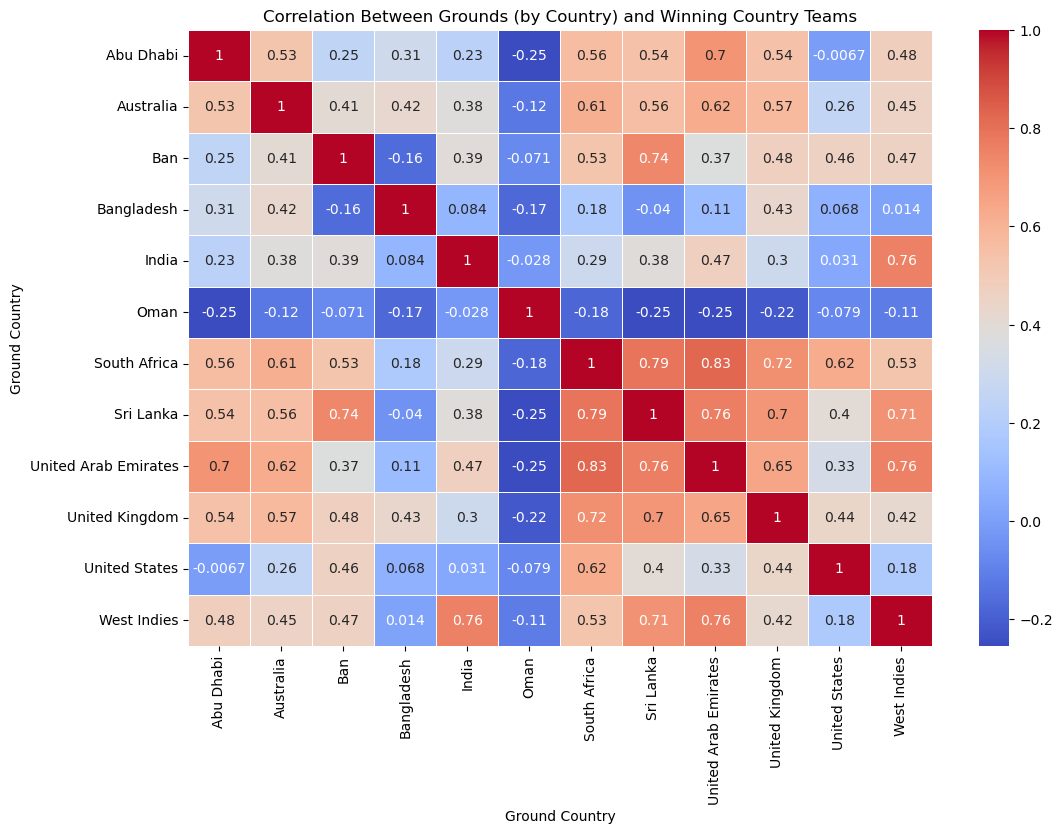

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Ground-to-country mapping provided
ground_country_mapping = {
    'Abu Dhabi': 'Abu Dhabi',
    'Adelaide': 'Australia',
    'Al Amerat': 'Oman',
    'Bengaluru': 'India',
    'Bridgetown': 'West Indies',
    'Brisbane': 'Australia',
    'Cape Town': 'South Africa',
    'Chattogram': 'Bangladesh',
    'Colombo (RPS)': 'Sri Lanka',
    'Dallas': 'United States',
    'Delhi': 'India',
    'Dharamsala': 'India',
    'Dubai (DICS)': 'United Arab Emirates',
    'Durban': 'South Africa',
    'Eden Gardens': 'India',
    'Geelong': 'Australia',
    'Gros Islet': 'West Indies',
    'Hambantota': 'Sri Lanka',
    'Hobart': 'Australia',
    'Johannesburg': 'South Africa',
    'Kingstown': 'West Indies',
    'Lauderhill': 'United States',
    'Lord\'s': 'United Kingdom',
    'Melbourne': 'Australia',
    'Mirpur': 'Ban',
    'Mohali': 'India',
    'Nagpur': 'India',
    'New York': 'United States',
    'North Sound': 'West Indies',
    'Nottingham': 'United Kingdom',
    'Pallekele': 'Sri Lanka',
    'Perth': 'Australia',
    'Providence': 'West Indies',
    'Sharjah': 'United Arab Emirates',
    'Sydney': 'Australia',
    'Sylhet': 'Bangladesh',
    'Tarouba': 'West Indies',
    'The Oval': 'United Kingdom',
    'Wankhede': 'India'
}

# Step 2: Map the grounds to countries in the dataset
wc_final_data_df['Ground Country'] = wc_final_data_df['Ground'].map(ground_country_mapping)

# Step 3: Pivot the data to create a matrix where rows are grounds (by country) and columns are winning countries
ground_winner_pivot = wc_final_data_df.pivot_table(index='Ground Country', 
                                                   columns='Winner', 
                                                   aggfunc='size', 
                                                   fill_value=0)

# Step 4: Transpose the pivot table so rows represent winning teams and columns represent grounds
ground_winner_transposed = ground_winner_pivot.T

# Step 5: Calculate the correlation between the grounds (by country) and winning teams
correlation_matrix = ground_winner_transposed.corr()

# Step 6: Find the maximum correlation value (excluding the diagonal)
correlation_matrix_no_diag = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
max_correlation_value = correlation_matrix_no_diag.max().max()
max_correlation_pair = correlation_matrix_no_diag.stack().idxmax()

# Step 7: Display the maximum correlation
print(f"The maximum correlation is {max_correlation_value:.2f} between grounds in {max_correlation_pair[0]} and {max_correlation_pair[1]}.")

# Step 8: Plot the correlation heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Grounds (by Country) and Winning Country Teams')
plt.show()


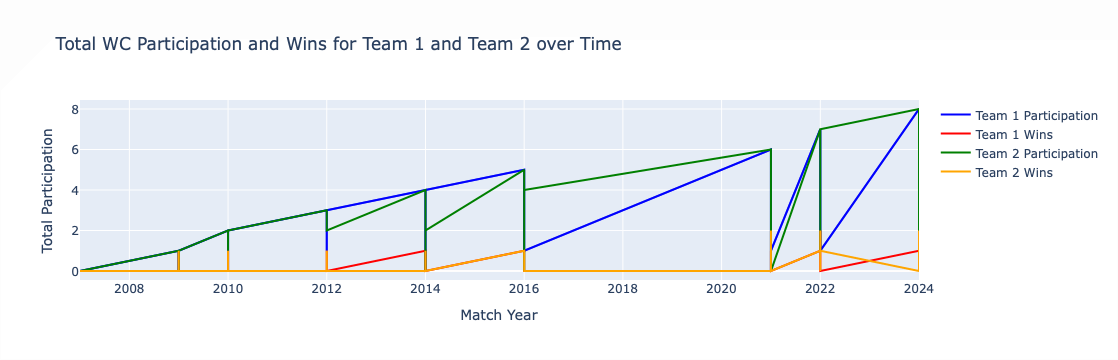

In [34]:
import pandas as pd
import plotly.express as px

# Ensure that 'Match Year' exists by extracting the year from 'Match Date' or similar date column
if 'Match Year' not in wc_final_data_df.columns:
    wc_final_data_df['Match Year'] = pd.to_datetime(wc_final_data_df['Match Date'], errors='coerce').dt.year  # Adjust based on actual date column

# Step 1: Create DataFrames that hold participation and wins for Team 1 and Team 2
team1_stats = pd.DataFrame({
    'Match Year': wc_final_data_df['Match Year'],  # Using 'Match Year' as the x-axis
    'Total Participation': wc_final_data_df['Team1 Total WCs participated'],
    'Total Wins': wc_final_data_df['Team1 Total WCs won']
})

team2_stats = pd.DataFrame({
    'Match Year': wc_final_data_df['Match Year'],  # Using 'Match Year' as the x-axis
    'Total Participation': wc_final_data_df['Team2 Total WCs participated'],
    'Total Wins': wc_final_data_df['Team2 Total WCs won']
})

# Step 2: Create the line plot for both Team 1 and Team 2 with four different colors
fig = px.line(team1_stats, 
              x='Match Year', 
              y='Total Participation', 
              title='Total WC Participation and Wins for Team 1 and Team 2 over Time',
              labels={'value': 'Count', 'Match Year': 'Match Year'}, 
              template='plotly')

# Add lines for each metric with different colors
fig.add_scatter(x=team1_stats['Match Year'], y=team1_stats['Total Participation'], mode='lines', name='Team 1 Participation', line=dict(color='blue'))
fig.add_scatter(x=team1_stats['Match Year'], y=team1_stats['Total Wins'], mode='lines', name='Team 1 Wins', line=dict(color='red'))

fig.add_scatter(x=team2_stats['Match Year'], y=team2_stats['Total Participation'], mode='lines', name='Team 2 Participation', line=dict(color='green'))
fig.add_scatter(x=team2_stats['Match Year'], y=team2_stats['Total Wins'], mode='lines', name='Team 2 Wins', line=dict(color='orange'))

# Step 3: Customize the layout


In [35]:
# Count players by country
players_by_country = players_df['Team'].value_counts()

# Display the team composition
print(players_by_country.head())


Team
Australia      136
New Zealand    135
Bangladesh     135
West Indies    135
England        135
Name: count, dtype: int64


In [36]:
# Group by Year and Team to count the number of players from each team in each year
player_participation_trends = players_df.groupby(['Year', 'Team']).size().reset_index(name='Player Count')

# Display the first few rows of the participation trends
print(player_participation_trends.head())


   Year        Team  Player Count
0  2007   Australia            13
1  2007  Bangladesh            15
2  2007     England            15
3  2007       India            15
4  2007       Kenya            15


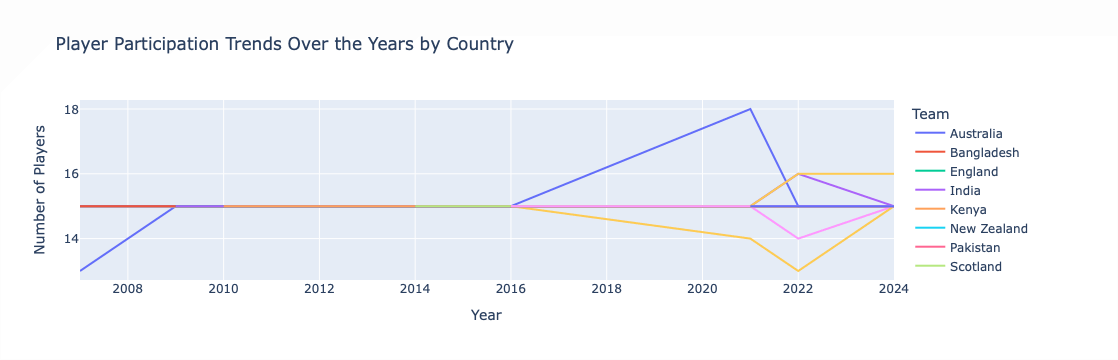

In [37]:
import plotly.express as px

# Line plot for player participation trends over the years
fig = px.line(player_participation_trends, 
              x='Year', 
              y='Player Count', 
              color='Team', 
              title='Player Participation Trends Over the Years by Country',
              labels={'Player Count': 'Number of Players', 'Year': 'Year'},
              template='plotly')

# Show the interactive plot
fig.show()


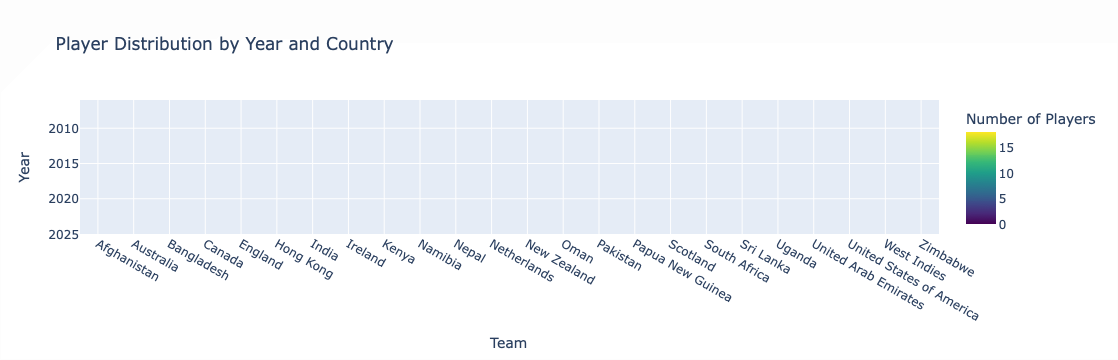

In [38]:
import pandas as pd
import plotly.express as px

# Correct URL to load the CSV file
url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/all_t20_world_cup_players_list.csv'
player_data = pd.read_csv(url)

# Step 1: Group by Year and Team to count the number of players per team each year
player_participation_trends = player_data.groupby(['Year', 'Team']).size().reset_index(name='Player Count')

# Step 2: Filter out any entries where the player count is zero (clean the data)
player_participation_trends = player_participation_trends[player_participation_trends['Player Count'] > 0]

# Step 3: Create a pivot table for the heatmap
player_distribution = player_participation_trends.pivot_table(index='Year', columns='Team', values='Player Count', fill_value=0)

# Step 4: Create the heatmap with an improved color scale
fig = px.imshow(player_distribution,
                title='Player Distribution by Year and Country',
                labels={'color': 'Number of Players'},
                aspect='auto',
                color_continuous_scale='Viridis')  # Adjusted color scale

# Show the heatmap
fig.show()


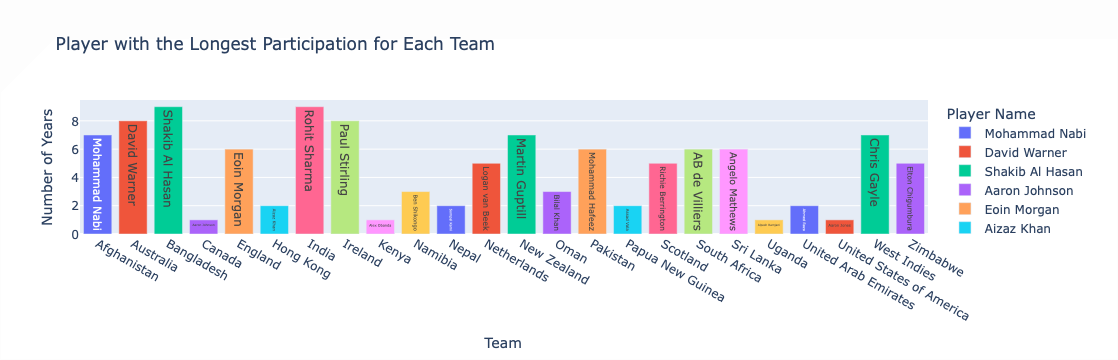

In [39]:
import pandas as pd
import plotly.express as px

# Step 1: Load the dataset
players_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/all_t20_world_cup_players_list.csv'
players_df = pd.read_csv(players_url)

# Step 2: Group by 'Player Name' and 'Team' and count the number of unique years for each player
player_participation = players_df.groupby(['Player Name', 'Team'])['Year'].nunique().reset_index(name='Years Participated')

# Step 3: Find the player with the longest participation for each team
longest_participation = player_participation.loc[player_participation.groupby('Team')['Years Participated'].idxmax()]

# Step 4: Create a bar plot showing the player with the longest participation for each country/team
fig = px.bar(longest_participation, 
             x='Team', 
             y='Years Participated', 
             color='Player Name', 
             title='Player with the Longest Participation for Each Team',
             labels={'Years Participated': 'Number of Years', 'Team': 'Team'},
             text='Player Name')

# Step 5: Show the plot
fig.show()


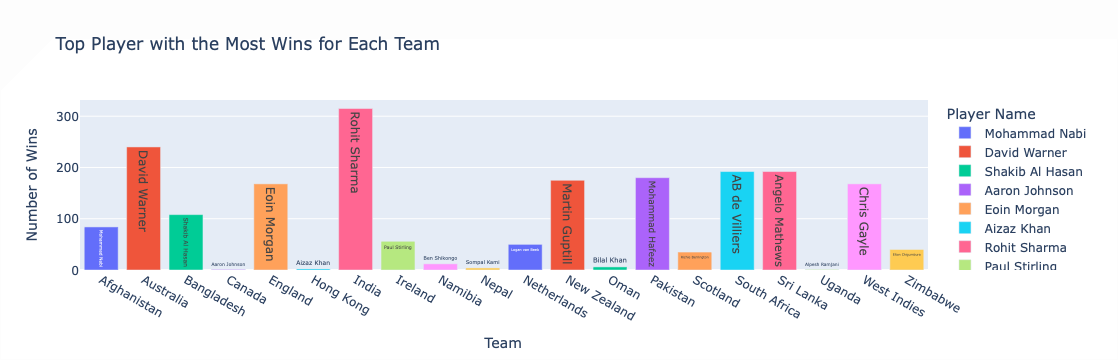

In [40]:
import pandas as pd
import plotly.express as px

# Step 1: Load the datasets
matches_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/all_t20_world_cup_matches_results.csv'
players_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/all_t20_world_cup_players_list.csv'

all_matches_data_df = pd.read_csv(matches_url)
players_df = pd.read_csv(players_url)

# Step 2: Merge based only on Team (and possibly Year)
merged_data = pd.merge(all_matches_data_df, players_df, how='inner', left_on='Winner', right_on='Team')

# Step 3: Count wins per player
player_wins = merged_data.groupby(['Player Name', 'Team']).size().reset_index(name='Wins')

# Step 4: Find the player with the most wins for each team
top_players_by_wins = player_wins.loc[player_wins.groupby('Team')['Wins'].idxmax()]

# Step 5: Create a bar plot showing the top player (most wins) for each country/team
fig = px.bar(top_players_by_wins, 
             x='Team', 
             y='Wins', 
             color='Player Name', 
             title='Top Player with the Most Wins for Each Team',
             labels={'Wins': 'Number of Wins', 'Team': 'Team'},
             text='Player Name')

# Step 6: Show the plot
fig.show()


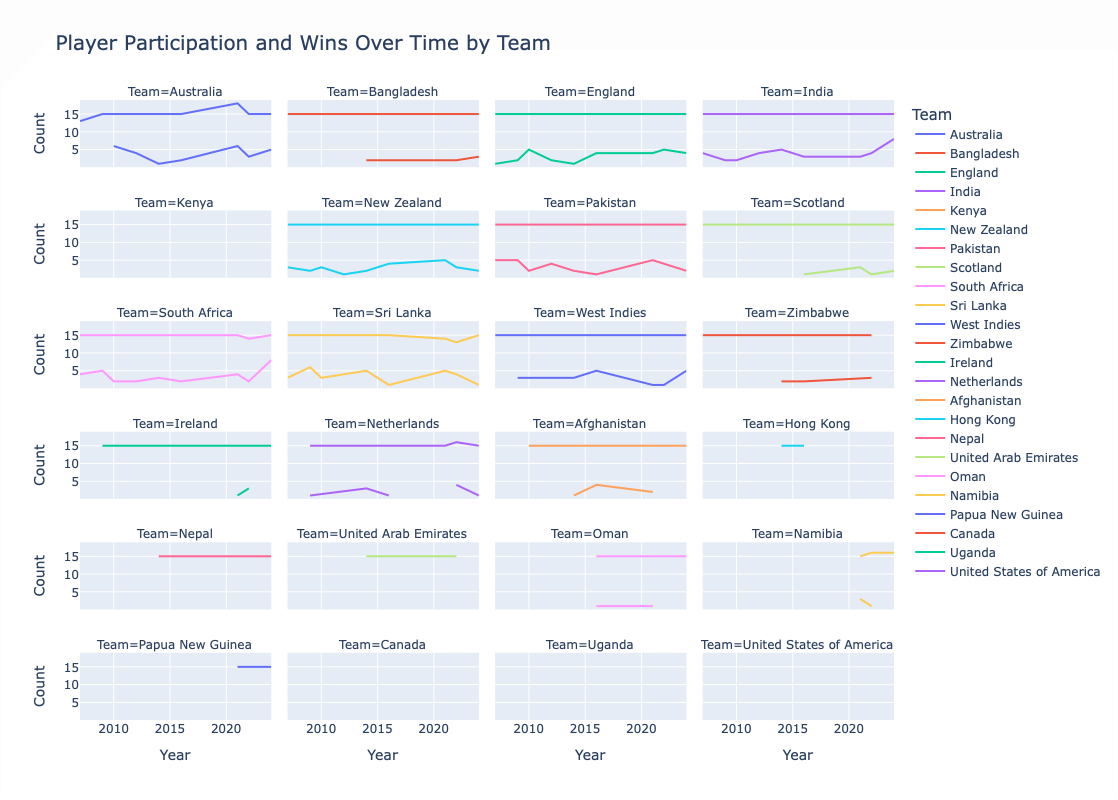

In [41]:
import pandas as pd
import plotly.express as px

# Step 1: Load all the datasets
matches_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/all_t20_world_cup_matches_results.csv'
players_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/all_t20_world_cup_players_list.csv'
final_dataset_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/wc_final_dataset.csv'

all_matches_data_df = pd.read_csv(matches_url)
players_df = pd.read_csv(players_url)
final_dataset_df = pd.read_csv(final_dataset_url)

# Step 2: Convert relevant columns to datetime format and extract year
all_matches_data_df['Match Date'] = pd.to_datetime(all_matches_data_df['Match Date'], errors='coerce')
all_matches_data_df['Match Year'] = all_matches_data_df['Match Date'].dt.year

players_df['Year'] = pd.to_datetime(players_df['Year'], format='%Y', errors='coerce').dt.year

# Step 3: Group players by year and team to count player participation
player_participation_over_time = players_df.groupby(['Year', 'Team']).size().reset_index(name='Player Count')

# Step 4: Group matches by year and team to count wins
team_wins_over_time = all_matches_data_df.groupby(['Match Year', 'Winner']).size().reset_index(name='Wins')

# Step 5: Merge the two datasets on Year and Team (Winner)
merged_data = pd.merge(player_participation_over_time, team_wins_over_time, how='left', left_on=['Year', 'Team'], right_on=['Match Year', 'Winner'])

# Step 6: Create a time series plot to show Player Count and Wins over time for each team
fig = px.line(merged_data, 
              x='Year', 
              y=['Player Count', 'Wins'], 
              color='Team', 
              title='Player Participation and Wins Over Time by Team',
              labels={'value': 'Count', 'Year': 'Year'},
              facet_col='Team', 
              facet_col_wrap=4,  # To show multiple teams in different subplots
              template='plotly')

# Step 7: Adjust the layout to make the plot larger
fig.update_layout(
    width=1200,  # Increase width
    height=800,  # Increase height
    title_font_size=20,  # Increase title font size
    legend_title_font_size=15  # Increase legend font size
)

# Step 8: Show the plot
fig.show()


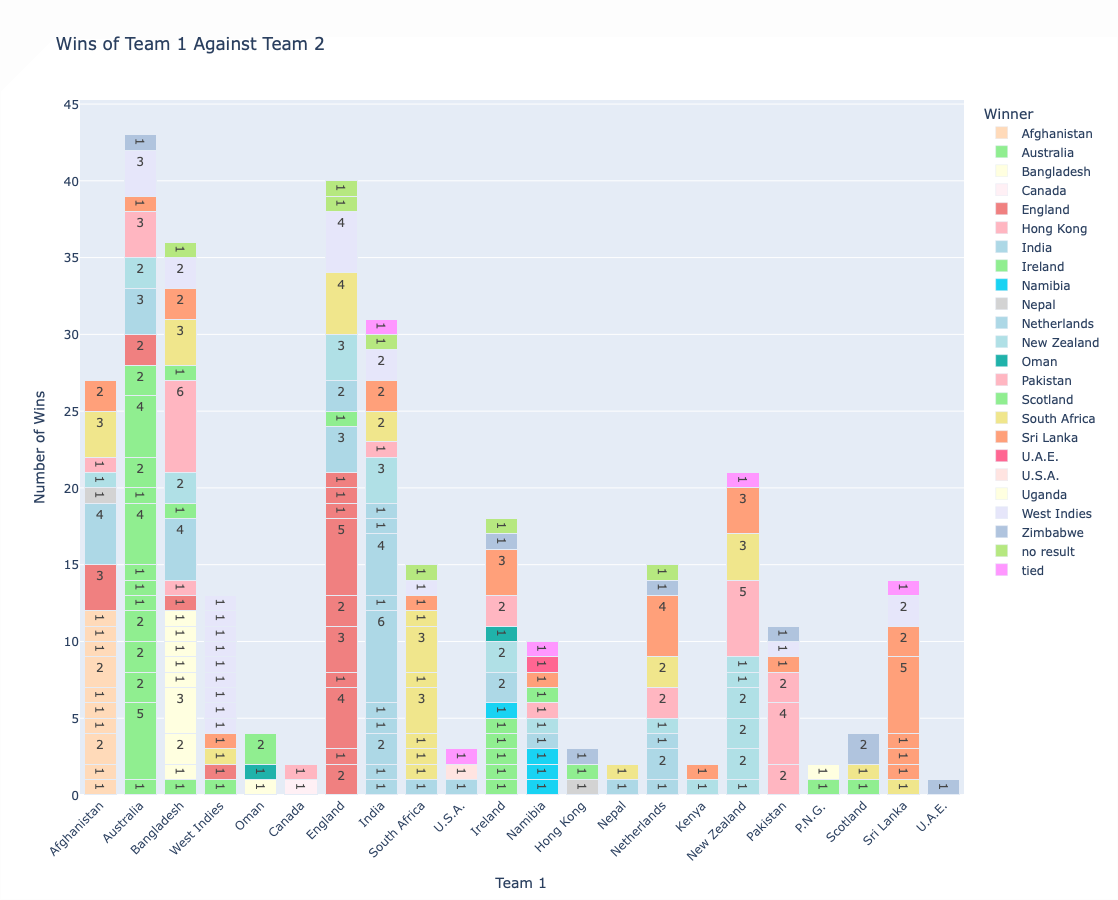

In [68]:
import pandas as pd
import plotly.express as px

matches_url = 'https://raw.githubusercontent.com/Shamsvi/CMSE-830/main/mens%20cwc/all_t20_world_cup_matches_results.csv'
all_matches_data_df = pd.read_csv(matches_url)

win_counts = all_matches_data_df.groupby(['Winner', 'Team1', 'Team2']).size().reset_index(name='Wins')

win_counts['Hover Text'] = win_counts.apply(lambda row: f"Team 1: {row['Team1']}<br>Team 2: {row['Team2']}<br>Winner: {row['Winner']}<br>Wins: {row['Wins']}", axis=1)

color_map = {
    'India': 'lightblue',
    'Australia': 'lightgreen',
    'England': 'lightcoral',
    'Pakistan': 'lightpink',
    'South Africa': 'khaki',
    'Sri Lanka': 'lightsalmon',
    'West Indies': 'lavender',
    'Bangladesh': 'lightyellow',
    'Nepal': 'lightgray',
    'Zimbabwe': 'lightsteelblue',
    'Afghanistan': 'peachpuff',
    'New Zealand': 'powderblue',
    'Netherlands': 'lightblue',
    'Scotland': 'lightgreen',
    'U.S.A.': 'mistyrose',
    'Ireland': 'lightgreen',
    'Kenya': 'lightcyan',
    'Oman': 'lightseagreen',
    'United Arab Emirates': 'lightgoldenrodyellow',
    'Hong Kong': 'lightpink',
    'P.N.G': 'lightcoral',
    'Canada': 'lavenderblush',
    'Uganda': 'lightyellow',
    'No Result': 'whitesmoke',  
    'Tied': 'lightgrey'  
}


fig = px.bar(win_counts, 
             x='Team1', 
             y='Wins', 
             color='Winner', 
             title='Wins of Team 1 Against Team 2',
             labels={'Wins': 'Number of Wins', 'Team1': 'Team 1'},
             text='Wins',
             hover_name='Hover Text',
             color_discrete_map=color_map)  

fig.update_layout(
    xaxis_title='Team 1',
    yaxis_title='Number of Wins',
    hovermode='closest',
    width=1000,  
    height=900,   
    barmode='stack',  
    xaxis_tickangle=-45,  
)

fig.show()
